# Implemention of the Behavior Pattern Method
nach 
Diamantini, C., Genga, L. & Potena, D. Behavioral process mining for unstructured processes. J Intell Inf Syst 47, 5–32 (2016). https://doi.org/10.1007/s10844-016-0394-7

In [2]:
import pm4py
from pm4py.objects.log.obj import EventLog
from pm4py.objects.log.obj import Event
from pm4py.objects.log.obj import Trace
from pm4py.objects.petri_net.obj import PetriNet
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
from pm4py.objects.petri_net.importer import importer as pnml_importer

import os
import json

## Import XES File
from https://pm4py.fit.fraunhofer.de/documentation#item-impoort-xes

Event Log, und Trace: 
https://pm4py.fit.fraunhofer.de/static/assets/api/2.2.16/pm4py.objects.log.html?  highlight=objects%20log%20obj%20eventlog#pm4py.objects.log.obj.EventLog

EventLog[] => Trace  
EventLog[][] => Event of Trace

#### Ist eine Bereiningung des Event Logs nötigt auf => Aktivitäten 
Der event Log zeigt die Events nicht die ausgeführten Aktivitäten, wirkt sich das aus auf die Generierung des Petri Net und Alignemt, weil die Events verwendet werden nicht die Aktivitäten.

In [3]:
path = "datasets/02_TestCompletedFFF_onlyTaskItems_simpleFilter.xes"
# path = "datasets/01_TestCompletedFFF_IDtoString_removeTransitionClassifier.xes"
log = xes_importer.apply(path)
log = pm4py.filter_case_size(log, 0, 300)

parsing log, completed traces :: 100%|██████████| 81/81 [00:01<00:00, 79.01it/s]


In [4]:
# Event dict Eigenschaften 
print(log[0][0])

{'lifecycle:transition': 'start', 'time:timestamp': datetime.datetime(2019, 11, 20, 13, 57, 10, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'cdb_process_id': 'P00062587', 'concept:instance': 326309, 'concept:name': 'Product Modification Responsible is correctly assigned?', 'description': "The task has been completed.  It's OK", 'division': 'UNDEFINED', 'msgtype': 'DONE', 'org:resource': '1079b397-2699-11ec-8124-0050568b0d8f', 'task_id': 'T00010248'}


BoxPLot, um Size Verteilung zu sehen und Ausreißer zu identifizieren.
Ziel dadurch das Modell zu vereinfachen und Zeit in dr Berechnung der Alignment zu sparen: 

Der BoxPLot zeigt anhand der Trace Sizes 2 Ausreißer an: >800 und >300


121.92405063291139


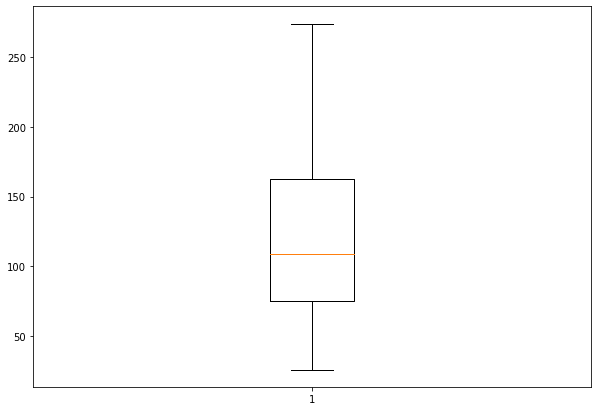

In [5]:
import matplotlib.pyplot as plt

# Creating dataset
data = list()
summe= 0
for trace in log:
    trace_len = len(trace)
    data.append(trace_len)
    summe += trace_len

print(summe/len(data))

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

### Adding Orga Unit und lifecycleTransition 
Ich verwende Division, weil Ressource ein zu komplexes Modell liefern würde und die Ressourcen verschlüsselt. Daher schwierig Aussagekraft abzuleiten. Aussage kräftiger, wenn Divisionen angeschaut. 

Probleme mit dem Discovery Modell mit dem zusammengesetzten Classifier aus der Division und Name.

Integration des lifecycle dauert die Generieung eins Petrinetzes sehr lange.

In [6]:
customClassifierDivision = "customClassifierDivision"
customClassifierRessource = "customClassifierRessource"

from log_classifier_helper import addDivisionClassifier


## Get Real Welt Modell as Petri Net 
with Inductive Miner Infrequent for Casual Relation  
from https://pm4py.fit.fraunhofer.de/documentation#item-3-2  
Parameters: https://pm4py.fit.fraunhofer.de/static/assets/api/2.1.0/pm4py.algo.discovery.inductive.html?highlight=parameters%20activity_key#pm4py.algo.discovery.inductive.parameters.Parameters

The noise threshold (between 0.0 and 1.0) to be used. Default: 0.2

Dauer ca. 2min

Division funktioniert

Division Lifecycle => bricht ab ohne fehler

Ressource funktioinert nicht! => Algorithmus bricht ab ohne Fehler-

In [7]:
##### Import Section

petri_net_division_name_Path = os.path.join("output/petri_net_division_name.pnml")
petri_net_name_Path = os.path.join("output/petri_net_name.pnml")

# addDivisionClassifier(log, customClassifierDivision)

net, initial_marking, final_marking = pnml_importer.apply(petri_net_name_Path)


In [8]:
# Print Einsicht PetriNet

""" place = net.places
print(place)
print(place.name)

arc = place.in_arcs[0]
print(arc.source.name, arc.source.label) """

""" # sind initial marker in places 
print(initial_marking)
print(final_marking)
places = net.places
for place in places:
    if place == final_marking or place == initial_marking:
      print('yes')
 """
""" places = net.places
for place in places:
  print("\nPLACE: "+place.name)
  for arc in place.in_arcs:
    print(arc.source.name, arc.source.label) """

""" print(net.arcs)
print(net.places)
print(net.transitions) """
""" print(net.places)
print(net.transitions) """

for trans in net.transitions:
    print(trans.label, trans.name)

""" # stille Transitionen
transList = list()
for trans in net.transitions:
    if (trans.label == None):
        transList.append(trans)
print(len(transList)) """

## print(net.arcs[0].name)

G6 - 3: Consider risk/benefit & turnover potential 19387ead-bbce-4698-af12-48c78f762b66
None skip_105
None skip_67
None init_loop_288
None init_loop_116
None init_loop_176
None init_loop_238
G7 - 6: QMA Check 1 98b22fe8-124d-44ff-ae1c-73aa06ccc831
None skip_95
None init_loop_34
None skip_179
None skip_100
None tauSplit_68
None init_loop_202
None skip_226
Status Change EC: Evaluated accfb0b9-30b3-4fc1-8d17-24e82ed36c5f
None skip_134
None tauJoin_69
None skip_302
G9-2: All parts ready for production - AUTO STATE CHANGE cd46504a-04e4-4c2e-8da3-2653c9a6518c
None skip_231
None init_loop_84
None init_loop_110
None init_loop_215
None skip_237
None skip_150
None init_loop_157
P00067317 80c2ef7b-8e28-45e0-8978-17310c84be06
None skip_91
None skip_131
None init_loop_284
None init_loop_17
None skip_118
None tauJoin_143
None skip_36
None init_loop_63
None skip_76
None skip_229
Set Workspace to "released" 55cbe9a3-a70f-4ab1-9f52-2dd821d5098a
None skip_81
None skip_258
None skip_213
None skip_305
Non

' # stille Transitionen\ntransList = list()\nfor trans in net.transitions:\n    if (trans.label == None):\n        transList.append(trans)\nprint(len(transList)) '

## From Petri Netz zu Instance Ordering  

### Casual Relation:

Zwei events i, j haben eine Causal Relation, wenn i erst abgeschlossen werden muss, damit j ausgeführt werden kann.  
Das Petri Netz ist Modell und die CR Relation, bzw. die Grundlage davon. Mithilfe der Funktionen get PreCR und getPostCR from PetriNet Transition.

### Instance Ordering: 

i, j und k sind Events; i<k<j  
Es besteht eine CR Relation zwischen i und j;  
und  
(Es darf keine CR Relation zwischen i und k:  
Oder  
Es darf keine CR Relation zwischen k und j geben;)  

Bezug zum Petri Netz, welches als Grundlage für die CR Relation verwendet wird:  
Ein Event ist im Petri Netz eine Transition; der Aktivitäten Name kann über Label aufgerufen werden.

Siehe hierzu auch  
https://pm4py.fit.fraunhofer.de/static/assets/api/2.2.16/pm4py.objects.petri_net.html?highlight=petrinet#pm4py.objects.petri_net.obj.PetriNet  
https://pm4py.fit.fraunhofer.de/documentation#item-4-2

In [9]:
# Ist Transition in Trace
## Achtung eine Aktivität hat mehrere Events (start,, complete ect.), d.h. es tritt in trace mehrfach auf
## TODO: Eine Aktivität kann mehrfach auftreten, und von jemanden andern durchgeführt werden, wie behandeln wir diesen Fall? 
# Aktuell erscheine mehrfach auftretende Aktivitäten dadurch erscheinen, dass sie im Pnetz drin ist. Was unsere CR Grundlage ist.
# Das reicht aus, weil wir die Instance ordering nur auf Basis der CR bemessen. 
# die delted und inserted Aktivitäten bekommen wird bei der Reparatur aus. später heraus
# Sollen wir diese Fälle unterscheiden, indem wir den Namen und die 
""" for trans in net.transitions:
    transLabel = str(trans.label) # eventname der aktuellen iteration
    isTransInTrace = lambda event: transLabel == event[customClassifierDivision]
    filteredItems = list(filter(isTransInTrace , trace))
    # prüfe Aktivität im PNetz auftaucht; theoretisch unnötig Petri Netz aus eventlog generiert
    if(len(filteredItems)>0):
        print('Is part', len(filteredItems))
        # print(transLabel + 'is Part of Trace')
    else:
        print('Is Not Part of Trace: ', len(transLabel)
        #print('Is Not Part of Trace: ', transLabel) """

" for trans in net.transitions:\n    transLabel = str(trans.label) # eventname der aktuellen iteration\n    isTransInTrace = lambda event: transLabel == event[customClassifierDivision]\n    filteredItems = list(filter(isTransInTrace , trace))\n    # prüfe Aktivität im PNetz auftaucht; theoretisch unnötig Petri Netz aus eventlog generiert\n    if(len(filteredItems)>0):\n        print('Is part', len(filteredItems))\n        # print(transLabel + 'is Part of Trace')\n    else:\n        print('Is Not Part of Trace: ', len(transLabel)\n        #print('Is Not Part of Trace: ', transLabel) "

### Problem My Instance ordering Implementation
![alt text](assets/my_implementation_instance_ordering_problem1.png "Title")
![alt text](assets/my_implementation_instance_ordering_problem2.png "Title")

## Auswertung der Kanten 
Bei Einsatz eines Classifiers für die Combi aus Division kommt ein Petri Net heraus, bei dem es kein einzige Kanten gibt in dem 2 nodes aus dem Traces verbunden sind!
Aus diesen Grudn erwäge Rückkehr zu dem nur da dort bessere ergebnisse fpr das Instnce Ordeing erzielt werdden konnte!

Mögliche Ursachen, aber nicht hier erforscht. das wegen geringer Daten dichte sich nichts so spezigsiches Verhalten heraiuskristallsieren kann.



In [10]:
from instance_graph import getInstanceOrdering
from instance_graph import getTransitionsConnectedPerNodesFromPetriNet

In [11]:
instanceOrderingRelWithOneSilentTransitions  = 0
instanceOrderingRelActivitysOnly  = list()
instanceOrderingRelWithSilentTransitionsOnly = 0
orTranslist = getTransitionsConnectedPerNodesFromPetriNet(net)
instanceOrdering =getInstanceOrdering(net)
for transTuple in orTranslist:
    if(all(trans.label !=None and trans.label !=None for trans in transTuple )):
        instanceOrderingRelActivitysOnly.append(transTuple)
    elif(all(trans.label ==None and trans.label ==None for trans in transTuple )):
        instanceOrderingRelWithSilentTransitionsOnly +=1
    else:
        instanceOrderingRelWithOneSilentTransitions +=1

print('OrTrans: ', len(orTranslist))
print('instanceOrdering: ', len(instanceOrdering))
print('WithOneSilent: ', instanceOrderingRelWithOneSilentTransitions)
print('WithSilentOnly: ', instanceOrderingRelWithSilentTransitionsOnly)
print('NonSilent: ', len(instanceOrderingRelActivitysOnly))

assert(0==len(orTranslist)-instanceOrderingRelWithOneSilentTransitions-instanceOrderingRelWithSilentTransitionsOnly - len(instanceOrderingRelActivitysOnly))

OrTrans:  619
instanceOrdering:  619
WithOneSilent:  392
WithSilentOnly:  207
NonSilent:  20


First two should be same

Mit Division Classifier:  
OrTrans:  1020  
instanceOrdering:  1020  
WithOneSilent:  579  
WithSilentOnly:  415  
NonSilent:  26  

Ohne Custom Classifier:  
OrTrans:  619  
instanceOrdering:  619  
WithOneSilent:  392  
WithSilentOnly:  207  
NonSilent:  20  

## Instance Graphen

Werden aus dem Instance Ordering, welches  aus der vorangegangen Methode erhalten haben.
Es wird nun nach den Vorgaben aus den Wissenschaftlichen Beitrag ein Instanz Graph erstellt.  
Ein Instance Graph wird ein Tupel aus Knoten, edges und einen Dicht sein, welches ein Mapping zwischen dem den Knoten und dem entsprechenden Log Event darstellt.

Referenzen zum Event Log
https://pm4py.fit.fraunhofer.de/static/assets/api/2.2.16/pm4py.objects.log.html?highlight=eventlog#pm4py.objects.log.obj.EventLog



Füge Silent Transition hinzu, weil sonst Fälle auftreten in denen kaum Kanten erscheinen.

In [12]:
## instance_graph.py
from instance_graph import genInstanceGraph
from instance_graph import buildingInstanceGraphsFromLog

In [13]:
classifier="concept:name"

silent_transition_substrings = {'skip', 'init_log', 'tauJoin', 'tauSplit'}
isSilentTransistion = lambda node: any([substring in node for substring in silent_transition_substrings])

yayNormal = 0
yaySilent = 0

trace = log[1]
print(trace.attributes['variant'])
InstanceOrdering = getInstanceOrdering(net)
nodes = {event[classifier] for event in trace}
print(len(InstanceOrdering))
for (source, target) in InstanceOrdering:
    #print(source, target)
    if(target in nodes and source in nodes):
        yayNormal +=1
print('____________')
print(len(InstanceOrdering))
for (source, target) in InstanceOrdering:
    #print(source, target)
    if(target in nodes and isSilentTransistion(source) or source in nodes and isSilentTransistion(source)):
        yaySilent +=1

print('yayNormal',yayNormal)
print('yaysilent',yaySilent)

edges = {(source, target) for (source, target) in InstanceOrdering if target in nodes and source in nodes}
silentEdges ={(source, target) for (source, target) in InstanceOrdering if target in nodes and isSilentTransistion(source) or source in nodes and isSilentTransistion(source)}

print('normalEdges:', len(edges))
print('silentEdges:', len(silentEdges))

edges.update(silentEdges)
print('Edges:', len(edges))
    
print('normalNodes:', len(nodes))
silentNodes = { node for edge in silentEdges for node in edge if node not in nodes}
print('silentNodes:', len(silentNodes))
nodes.update(silentNodes)
print('Nodes:', len(nodes))

print('____________')

nodes2,edges2, evenDict =genInstanceGraph(trace, InstanceOrdering)
print(len(nodes2))
print(len(edges2))

Variant 2
619
____________
619
yayNormal 0
yaysilent 60
normalEdges: 0
silentEdges: 60
Edges: 60
normalNodes: 54
silentNodes: 40
Nodes: 94
____________
94
60


### Generiere alle Instanz Graphen

In [14]:
classifier = None

instanceGraphs = list()
instanceOrdering = getInstanceOrdering(net)
for instance in log:
    nodes, edges, nodeEventDict = genInstanceGraph(instance, instanceOrdering)
    instanceGraphs.append((nodes, edges, nodeEventDict))


## Repair irreguläre Instanz Graphen 

### PM4Py Alignment: Kosten der Abweichen benutzen zum aufspüren irregulärer Traces
https://pm4py.fit.fraunhofer.de/documentation#item-5-2

Spüren mithilfe der aligmentn Kosten auf ob deletet oder inserted. Nach Definiion.

Docs: https://pm4py.fit.fraunhofer.de/static/assets/api/2.2.16/pm4py.algo.conformance.alignments.petri_net.html#pm4py.algo.conformance.alignments.petri_net.algorithm.apply_log

Alignment zu berechnen dauert lange in Jupyter: bis zu 30h

Source: S. 105 & 106 Diamantini, C., Genga, L., Potena, D., and van der Aalst, W. 2016. “Building instance graphs for highly variable processes,” Expert Systems with Applications (59), pp. 101-118 (doi: 10.1016/j.eswa.2016.04.021).


### Alignment
* Sync move: the classification of the event corresponds to the transition label; in this case, both the trace and the model advance in the same way during the replay.
+ Move on log: for couples where the second element is », it corresponds to a replay move in the trace that is not mimicked in the model. This kind of move is unfit and signal a deviation between the trace and the model.
* Move on model: for couples where the first element is », it corresponds to a replay move in the model that is not mimicked in the trace. For moves on model, we can have the following distinction:
  * Moves on model involving hidden transitions: in this case, even if it is not a sync move, the move is fit.
  * Moves on model not involving hidden transitions: in this case, the move is unfit and signals a deviation between the trace and the model.
  
from https://pm4py.fit.fraunhofer.de/documentation#item-5-2

### Irregulare Traces / Move in the Model
Irregular Traces are Move in the Models. In such a way it is described in  
S. 106 Diamantini, C., Genga, L., Potena, D., and van der Aalst, W. 2016. “Building instance graphs for highly variable processes,” Expert Systems with Applications (59), pp. 101-118 (doi: 10.1016/j.eswa.2016.04.021).

log move = inserted; model move = deleted vgl. s. 106 in Diamantini et al 2016 

In [15]:
# conformance_with_alignment
from conformance_with_alignment import loadAlignment
from conformance_with_alignment import sortLogAndModelMove
from conformance_with_alignment import sortLogAndModelMoveWithSilent

Alignment Berechnung in kleine Teile aufgespalten und in Json gesichert:  
JSON from here https://www.geeksforgeeks.org/read-write-and-parse-json-using-python/?ref=lbp

In [16]:
alignmentDict = loadAlignment(log)
for key, item in alignmentDict.items():
    alignment = item['alignment']
    lenAlign = len(alignment)
    modelMoves, logMoves = sortLogAndModelMove(alignment)
    modelmSil, LogmSil = sortLogAndModelMoveWithSilent(alignment)
    lenModelMoves = len(modelMoves)
    lenlogMoves = len(logMoves)
    anteil = (lenModelMoves +lenlogMoves) / lenAlign
    print(key + ' Alignments: ' + str(lenAlign))
    print('irregular Traces (ohne Silent): ' + str(lenModelMoves+lenlogMoves ))
    print('Fitness: ' + str(item['fitness']))
    print('irregular Traces Anteil: ' + str(anteil))
    print('ModelMoves:' + str(lenModelMoves))
    print('ModelMovesSil:' + str(len(modelmSil)-lenModelMoves))
    print('LogMoves:' + str(lenlogMoves))
    print('LogMovesSil:' + str(len(LogmSil)-lenlogMoves))
    print('______________________')


Variant 14 Alignments: 162
irregular Traces (ohne Silent): 0
Fitness: 1.0
irregular Traces Anteil: 0.0
ModelMoves:0
ModelMovesSil:1
LogMoves:0
LogMovesSil:0
______________________
Variant 18 Alignments: 147
irregular Traces (ohne Silent): 2
Fitness: 0.9444444444444444
irregular Traces Anteil: 0.013605442176870748
ModelMoves:0
ModelMovesSil:1
LogMoves:2
LogMovesSil:0
______________________
Variant 30 Alignments: 166
irregular Traces (ohne Silent): 2
Fitness: 0.9466666666666667
irregular Traces Anteil: 0.012048192771084338
ModelMoves:0
ModelMovesSil:1
LogMoves:2
LogMovesSil:0
______________________
Variant 39 Alignments: 91
irregular Traces (ohne Silent): 2
Fitness: 0.935483870967742
irregular Traces Anteil: 0.02197802197802198
ModelMoves:2
ModelMovesSil:1
LogMoves:0
LogMovesSil:0
______________________
Variant 44 Alignments: 160
irregular Traces (ohne Silent): 1
Fitness: 0.9672131147540983
irregular Traces Anteil: 0.00625
ModelMoves:0
ModelMovesSil:1
LogMoves:1
LogMovesSil:0
___________

Note that although edges in Ea are not allowed by the model, using these edges to connect the occurred insertion we limit significantly the overgeneralization with respect the original iIG IGins .


## Reparierte Instance Graphen bauen

In [17]:
defaultConfig = {'eventLog': log,'netImportPath':"output/petri_filtered.pnml",'min_case_size':0,'max_case_size':300, 'classifier': customClassifierDivision, 'netImportPath': path }

# net, initial_marking, final_marking = pnml_importer.apply(os.path.join(importPath))
variantAlignmentDict = loadAlignment(log)
instanceGraphsDict = buildingInstanceGraphsFromLog(log,net,variantAlignmentDict)

Variant 1
nodes 89
Anzahl Edges InstanceGraph build: 58
Kann keine Kanten für deletion hinzufügen! Check Part Roles, Docs & Parts to be changed
casualSuccessor: 2
casualSuccessor: 0
Kann keine Kanten für deletion hinzufügen! Check Part Roles, Docs & Parts to be changed
casualSuccessor: 2
casualSuccessor: 0
Kann keine Kanten für deletion hinzufügen! Check Part Roles, Docs & Parts to be changed
casualSuccessor: 2
casualSuccessor: 0
Anzahl Edges Repaired InstanceGraph build: 69
Variant 2
nodes 94
Anzahl Edges InstanceGraph build: 60
Anzahl Edges Repaired InstanceGraph build: 69
Variant 3
nodes 99
Anzahl Edges InstanceGraph build: 63
Kann keine Kanten für deletion hinzufügen! P00066997
casualSuccessor: 0
casualSuccessor: 0
Kann keine Kanten für deletion hinzufügen! P00066997
casualSuccessor: 0
casualSuccessor: 0
Kann keine Kanten für deletion hinzufügen! P00066997
casualSuccessor: 0
casualSuccessor: 0
Kann keine Kanten für deletion hinzufügen! P00066997
casualSuccessor: 0
casualSuccessor: 

##Eigenschaften die der die Graphen erfüllen müssen, für Forschunsgfrage



#### Knoten
v # label  
#: is a unique vertex ID for the graph   
label: is any string or real number.  
Strings containing white-space or the comment character (see below) must be surrounded by double-quotes.   
Knoten IDs for a graph must start at 1 and increase by 1 schrittweise aufeinanderfolgend.  
It should also be noted that there must be at least one vertex defined before any edges are defined.

#### Kanten
e vertex 1 # vertex 2 # label  
d vertex 1 # vertex 2 # label  
u vertex 1 # vertex 2 # label   
vertex 1 # and vertex 2 # are the vertex ID's for the source vertex and the target vertex respectively  
label: is any string or real number. Strings containing white-space or the comment 
character (see below) must be surrounded by double-quotes.   
Edges beginning with “e” are assumed directed unless the option “-undirected” is specified at the command line (see next section), in which 
case all “e” edges become undirected. Edges beginning with “d” are always directed, and edges beginning with “u” are always undirected.

In [18]:
def getSubdueGraph(instanceGraph: tuple[set, set[tuple], dict]):

    nodes, edges, nodeeventDict = instanceGraph

    subdueGraphNodesDict = dict()
    subdueGraphNodes = list()
    subdueGraphEdges = list()
    nodes = list(nodes)
    for index in range(len(nodes)):
        subdueGraphNodesDict[nodes[index]] = index
        subdueGraphNodes.append('v ' + str(index) + ' "' + nodes[index] + '"')
    for edge in edges:
        source = str(subdueGraphNodesDict[edge[0]])
        target = str(subdueGraphNodesDict[edge[1]])
        subdueGraphEdges.append('d '+ source + ' ' + target + ' ""' )
    
    return subdueGraphNodes, subdueGraphEdges


In [19]:

# overwrite
f = open("output/subdueGraphs.txt", "w")
f.write("")
f.close()


def writeSubDueInputFile(variant, subdueGraphNodes, subdueGraphEdges):
    f = open("output/subdueGraphs.txt", "a")
    f.write('%' +variant+'%' + "\n")
    f.write('xp' + "\n")
    for nodestr in subdueGraphNodes:
        f.write(nodestr + "\n")
    f.write("\n")
    for edgestr in subdueGraphEdges:
        f.write(edgestr + "\n")
    f.write("\n")
    f.write("\n")
    f.close()

for key, instanceGraph in instanceGraphsDict.items():
    subdueGraphNodes, subdueGraphEdges = getSubdueGraph(instanceGraph)
    writeSubDueInputFile(key, subdueGraphNodes, subdueGraphEdges)

## Visualisierung Instance Graphen

Bibliothek NetworkX Data Struktur  
https://networkx.org/documentation/stable/tutorial.html  
https://networkx.org/documentation/stable/reference/classes/digraph.html  
https://www.youtube.com/watch?v=xREnpVUbkFI  
Hierachie Graph (Baum): https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-  
Flow Chart, with Lib:
https://stackoverflow.com/questions/39801880/how-to-use-the-pos-argument-in-networkx-to-create-a-flowchart-style-graph/39863493  
https://github.com/paulbrodersen/netgraph  
Network X Flow Chart Template:   
https://stackoverflow.com/questions/22920433/python-draw-flowchart-illustration-graphs

In [87]:
from draw_instance_graph import drawInstanceGraph
from draw_instance_graph import transformToNetworkxGraph

In [88]:
""" for variant, iGraph in instanceGraphsDict.items():
    plot  = drawInstanceGraph(iGraph)
    plot.savefig('output/graphs/'+variant+'.png')
    plot.close() """

" for variant, iGraph in instanceGraphsDict.items():\n    plot  = drawInstanceGraph(iGraph)\n    plot.savefig('output/graphs/'+variant+'.png')\n    plot.close() "

## Combination of all functions do compute BP

In [62]:
def mineBehBehavioralPattern(eventLog: EventLog, net: PetriNet, alignment: dict, classifier="concept:name"):
    instanceGraphDict = buildingInstanceGraphsFromLog(eventLog, net, alignment, classifier)
    behavioralPattern = computeBehavioralPattern()